# PROJECT 
INSTABOT

In [283]:
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from bs4 import BeautifulSoup
from collections import OrderedDict 
import time
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [284]:
driver = webdriver.Chrome(executable_path = '/Users/yashlakhwani/Downloads/chromedriver')
driver.maximize_window()

<ipython-input-284-257a54280197>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path = '/Users/yashlakhwani/Downloads/chromedriver')


In [285]:
driver.get('https://www.instagram.com/')

In [286]:
username = 'USERNAME'
password = 'PASSWORD'

In [287]:
wait = WebDriverWait(driver, 10)

In [288]:
def LogIn(username, password):
    try :
        user_name = wait.until(EC.presence_of_element_located((By.NAME,'username')))
        user_name.send_keys(username)
        #locating password box and sending password
        pwd = driver.find_element_by_name('password')
        pwd.send_keys(password)
        #locating login button 
        button = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="loginForm"]/div[1]/div[3]/button/div')))
        button.submit()
        #Save Your Login Info? : Not Now
        pop = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="react-root"]/section/main/div/div/div/div/button')))
        pop.click()
        #TurnONnotifications
        notifications = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_a9_0')))
        notifications.click()
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [289]:
LogIn(username, password)

<ipython-input-288-584002d22f99>:6: DeprecationWarning: find_element_by_name is deprecated. Please use find_element(by=By.NAME, value=name) instead
  pwd = driver.find_element_by_name('password')


In [290]:
def search(s):
    try:
        sb = driver.find_element(by = By.CLASS_NAME, value = '_aawh')
        sb.send_keys(s)
        time.sleep(7)
        all_hand = driver.find_elements(by = By.CLASS_NAME, value = '_aba8')
        time.sleep(5)
        name = []
        for i in all_hand:
            if i.text.startswith('#'):
                continue
            else:
                name.append(i.text)


        sb.clear()

        handles = []
        for i in name:
            if i == '':
                continue
            else:
                handles.append(i.split('\n')[0])
                
        return handles
                
    except TimeoutException :
        print('No Search Found!')

In [291]:
def search_for_handle(s):
    sb = driver.find_element(by = By.CLASS_NAME, value = '_aawh')
    sb.send_keys(s)

    time.sleep(5)
    
    handle = driver.find_element(by = By.CLASS_NAME, value = '_abm4')
    handle.click()

In [292]:
def home():
    home = driver.find_element(by = By.XPATH, value = '//div[contains(@class,"_acuq")]//div[contains(@class,"_acut")]')
    home.click()

In [293]:
def clear_search():
    but = driver.find_element(by = By.CLASS_NAME, value = '_aaw8')
    but.click()
    
    time.sleep(3)
    
    clear = driver.find_element(by = By.CLASS_NAME, value = '_aawn')
    clear.click()

# Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

## --> From the list of instagram handles you obtained when you searched ‘food’ . Open the first 10 handles and find the top 5 which have the highest number of followers

### --> Searching first 10 user handles

In [294]:
s = 'food'
handles = search(s)

In [295]:
first_10 = handles[:10]
first_10

['food',
 'food.se.pyaar',
 'food_foodlyf',
 'foodie_incarnate',
 'foodiee_aayushi',
 'delhi_streets_food',
 'zaik.adillika',
 'food_x_kaur',
 'foodtalkindia',
 'dilsefoodie']

### --> getting top 5 based on followers from above first 10 list

In [296]:
def top_5(lst):
    try:
        #dct contains username with number of followers
        dct = {}
        for i in lst :
            #fixing a flaw 
            if i == 'food':
                driver.get('https://www.instagram.com/food/')
                time.sleep(5)
            else:
                #This fuction will search a user and open that profile
                search_for_handle(i)
                time.sleep(5)
            #locating followers of user
            followers = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'_ac2a')))[1]
            #replacing ',' with '' and converted into int
            dct[i] = int(followers.get_attribute('title').replace(',' , ''))
            
            clear_search()
        #top 5 most followed user
        count = 0
        res = OrderedDict()
        for i in sorted(dct, key=dct.get, reverse=True):
            res[i] = dct[i]
            count += 1
            if(count >= 5) : 
                break
                
        return res
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [297]:
top_handles = top_5(first_10)

In [298]:
print('Top 5 instagram handles which have the highest number of followers :')
for uname in top_handles:
    print(uname,'---->',top_handles[uname])

Top 5 instagram handles which have the highest number of followers :
foodie_incarnate ----> 1364579
dilsefoodie ----> 1023716
foodtalkindia ----> 308103
food ----> 180693
delhi_streets_food ----> 38667


## --> Now Find the number of posts these handles have done in the previous 3 days.

In [299]:
def count_of_post(day):
    try :
        #locating first post
        post = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aabd')))
        post.click()
        
        count = 0 
        while True :
            #getting date of the the post
            temp = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aaqe')))
            #getting date in string format
            date_string = temp.get_attribute('datetime')
            #converting into date format
            date = datetime.strptime(date_string[0:19], "%Y-%m-%dT%H:%M:%S")
            #taking differnce between today's date and post posted date
            if (datetime.now() - date).days > day :
                break
            else :
                count += 1
            #locating next button
            next_but = wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"_aaqg")]/button[contains(@class,"_abl-")]')))
            next_but.click()
        #closing the post
        close=driver.find_element_by_xpath("//div[contains(@class,'o9tjht9c')]/div[contains(@class,'oajrlxb2')]")
        close.click()
        return count
    
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [300]:
total_post_count = {}
for i in top_handles :
    if i == 'food':
        driver.get('https://www.instagram.com/food/')
        time.sleep(5)
    else:
        search_for_handle(i)
        time.sleep(5)
    count = count_of_post(3)
    total_post_count[i] = count
    clear_search()

<ipython-input-299-bf95eff8cce4>:24: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  close=driver.find_element_by_xpath("//div[contains(@class,'o9tjht9c')]/div[contains(@class,'oajrlxb2')]")


In [301]:
print('Number of posts these handles have done in the previous 3 days : -')
for i in total_post_count:
    print(i,total_post_count[i])

Number of posts these handles have done in the previous 3 days : -
foodie_incarnate 6
dilsefoodie 6
foodtalkindia 4
food 4
delhi_streets_food 0


## --> Depict this information using a suitable graph.

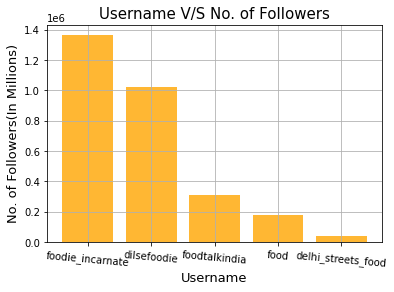

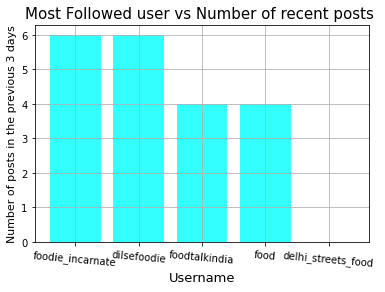

In [302]:
# using top_handles to get username and number of followers
x = top_handles.keys()
y = top_handles.values()
plt.bar(x,y,color='Orange', alpha = 0.8)
plt.ylabel("No. of Followers(In Millions)",size=13)
plt.xlabel("Username",size=13)
plt.xticks(rotation = -5)
plt.title('Username V/S No. of Followers',fontsize=15, color='Black',alpha=3)
plt.grid()
plt.show()


# using total_post_count to get username and number of post
x = total_post_count.keys()
y = total_post_count.values()
plt.bar(x,y,color='cyan', alpha = 0.8)
plt.ylabel("Number of posts in the previous 3 days",size=11)
plt.xlabel("Username",size=13)
plt.xticks(rotation = -5)
plt.title('Most Followed user vs Number of recent posts ',fontsize=15, color='Black',alpha=3)
plt.grid()
plt.show()

# Your friend also needs a list of hashtags that he should use in his posts.

## --> Open the 5 handles you obtained, and scrape the content of the first 10 posts of each handle.

In [303]:
content=[]
hashtags=[]
#using top 5 user_handles
for user in top_handles:
    #if we search food the top result is foodtalkindia so there is a flaw which i have fixed in this way
    if user == 'food':
        driver.get('https://www.instagram.com/food/')
        time.sleep(3)
    else:
        time.sleep(3)
        #searching user_handle
        search_for_handle(user)
    
    time.sleep(3)
    #clicking on first post
    driver.find_element_by_xpath('//div[@class="_aagw"]').click()
    time.sleep(5)
    #running loop for 10 times to get 10 posts
    for i in range(10):
        time.sleep(3)
        #locating caption
        caption = driver.find_element_by_xpath('//div[contains(@class,"_a9zs")]/span[contains(@class,"_aacl")]').get_attribute('textContent')
        #appending the caption in our content list
        content.append(caption)
        #locating hastags
        hashtag = driver.find_elements_by_xpath('//div[contains(@class,"_a9zs")]/span[contains(@class,"_aacl")]/a')
        for i in hashtag:
            #in hashtag element there are certain mention tags also. So, I filtered it...
            if i.get_attribute('textContent')[0] == '#':
                #appending it to our hashtags list
                hashtags.append(i.get_attribute('textContent'))
                #Now our content and tags have been added for the first post.
        #clicking on next for second post
        next_but = wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"_aaqg")]/button[contains(@class,"_abl-")]')))
        next_but.click()
    #closing the post box
    close=driver.find_element_by_xpath("//div[contains(@class,'o9tjht9c')]/div[contains(@class,'oajrlxb2')]")
    close.click()
    #clearing search bar.
    clear_search()
    

<ipython-input-303-69c4c4ab75b5>:16: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath('//div[@class="_aagw"]').click()
<ipython-input-303-69c4c4ab75b5>:22: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  caption = driver.find_element_by_xpath('//div[contains(@class,"_a9zs")]/span[contains(@class,"_aacl")]').get_attribute('textContent')
<ipython-input-303-69c4c4ab75b5>:26: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  hashtag = driver.find_elements_by_xpath('//div[contains(@class,"_a9zs")]/span[contains(@class,"_aacl")]/a')
<ipython-input-303-69c4c4ab75b5>:37: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  close=driver.find_element_by_xpath("//div[contains(@class,'o9tjht9c')]/div[con

In [304]:
for i in content:
    print(i)
    print('---------------------------------------------------------------------------')

Bhaang Making in India😱😱.Watch the full video on my YouTube channel. Link is in my bio🤗🤗.#foodieincarnate #reelitfeelit #reelkarofeelkaro #reelsinstagram #reels #bhaang #hash #high #viralfood #explore
---------------------------------------------------------------------------
HEAVENLY MYSORE PAK🤤🤤.Had it at Sri Venkateshwara Sweet Stall in Bangalore. This place is known for serving authentic Mysore pak from decades. I tried Mysore pak at a lot of places in Bangalore and this one was amongst the very best. It's texture was totally melt-in-mouth and it has such a rich taste of ghee in it.  We bought half a kg Mysore pak here at it took us barely 10 minutes to finish it all. Must try it if you happen to visit Bangalore.👍🏻.#foodieincarnate #sodelhi #newdelhi #foodtalkindia #desifood #delhigram #indianfood #barfi #mysorepak #bangalore #bengaluru #nammabangalore #nammabengaluru #nammakarnataka #southindian #southindianfood #dessert #desserts #delhifood #mumbaifood #mithai #indiandessert #gul

## --> Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [305]:
d = dict()
for i in hashtags:
    if i in d.keys():
        d[i] = d[i] + 1
    else:
        d[i] = 1
    
d

{'#foodieincarnate': 9,
 '#reelitfeelit': 3,
 '#reelkarofeelkaro': 5,
 '#reelsinstagram': 4,
 '#reels': 6,
 '#bhaang': 1,
 '#hash': 1,
 '#high': 1,
 '#viralfood': 3,
 '#explore': 4,
 '#sodelhi': 6,
 '#newdelhi': 5,
 '#foodtalkindia': 16,
 '#desifood': 3,
 '#delhigram': 6,
 '#indianfood': 6,
 '#barfi': 1,
 '#mysorepak': 1,
 '#bangalore': 1,
 '#bengaluru': 1,
 '#nammabangalore': 1,
 '#nammabengaluru': 1,
 '#nammakarnataka': 1,
 '#southindian': 1,
 '#southindianfood': 1,
 '#dessert': 4,
 '#desserts': 2,
 '#delhifood': 6,
 '#mumbaifood': 2,
 '#mithai': 2,
 '#indiandessert': 1,
 '#gulabjamun': 3,
 '#indianfoodbloggers': 6,
 '#bangalorefood': 1,
 '#soulfood': 1,
 '#desikhana': 7,
 '#sobangalore': 1,
 '#dessertporn': 1,
 '#Ajmersharif': 1,
 '#delhifoodblogger': 5,
 '#foodgasm': 15,
 '#foodporn': 5,
 '#foodpornshare': 4,
 '#foodlover': 5,
 '#foodgram': 14,
 '#foodiesofinstagram': 6,
 '#foodie': 14,
 '#indianstreetfood': 4,
 '#streetfood': 8,
 '#delhistreetfood': 5,
 '#streetfoodindia': 4,
 '#m

## Creating a csv file with two columns : the word and its frequency

In [306]:
word_used = np.array([i[1:] for i in d.keys()])
frequency = np.array([i for i in d.values()])
df = pd.DataFrame()
df['Words'] = word_used
df['Frequency'] = frequency
df.reset_index(drop=True)
df.to_csv('Hashtag_Frequencies.csv', index = False)

## --> Now, find the hashtags that were most popular among these bloggers

In [307]:
word_used = word_used[np.argsort(frequency)[::-1]]
frequency = frequency[np.argsort(frequency)[::-1]]

for i in range(len(word_used)):
    print(word_used[i],'-',frequency[i])

foodblogger - 16
foodtalkindia - 16
foodgasm - 15
foodgram - 14
foodie - 14
food - 12
instagram - 11
instagood - 11
foodies - 11
yummy - 10
delicious - 10
foodfeed - 10
foodtalk - 10
fti - 10
instafood - 10
foodiesofindia - 10
foodieincarnate - 9
streetfood - 8
dilsefoodie - 8
dilsecouple - 7
desikhana - 7
foodiesofinstagram - 6
indianfoodbloggers - 6
delhifood - 6
foodnews - 6
delhi - 6
reels - 6
indianfood - 6
delhigram - 6
sodelhi - 6
delhifoodblogger - 5
foodcollabs - 5
mumbai - 5
delhifoodie - 5
reelkarofeelkaro - 5
delhistreetfood - 5
indianfoodie - 5
foodporn - 5
newdelhi - 5
foodlover - 5
indianfoodblogger - 4
icecream - 4
streetfoodindia - 4
mumbaistreetfood - 4
indianstreetfood - 4
foodpornshare - 4
dessert - 4
bpraak - 4
explore - 4
whitehillmusic - 4
lekh - 4
reelsinstagram - 4
bewafaikargaya - 3
Reelitfeelit - 3
gulabjamun - 3
viralfood - 3
desifood - 3
FTIFinds - 3
reelitfeelit - 3
guacamole - 2
handcrafted - 2
guac - 2
desserts - 2
mumbaifood - 2
mithai - 2
breakfast - 2

## --> Plotting a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

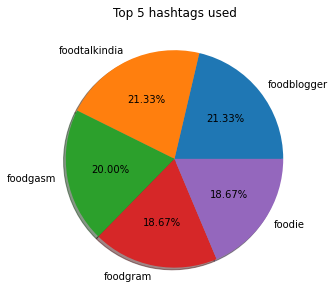

In [308]:
x = word_used[:5]
y = frequency[:5]
plt.figure(figsize = (5,5))
plt.pie(y, labels = x,shadow = True, autopct = '%.2f%%')
plt.title('Top 5 hashtags used')
plt.show()

## --> Find out the likes of the top 10 posts of the 5 handles obtained earlier.


In [310]:
likes=[]
#using top 5 user_handles
for user in top_handles:
    #if we search food the top result is foodtalkindia so there is a flaw which i have fixed in this way
    if user == 'food':
        driver.get('https://www.instagram.com/food/')
        time.sleep(3)
    else:
        time.sleep(3)
        #searching user_handle
        search_for_handle(user)
    
    time.sleep(3)
    #clicking on first post
    driver.find_element_by_xpath('//div[@class="_aagw"]').click()
    time.sleep(5)
    #running loop for 10 times to get 10 posts
    
    temp = []
    for i in range(10):
        time.sleep(3)
        if driver.find_element_by_xpath('//section[contains(@class,"_aa-7")]//div[contains(@class,"_aacl")]').get_attribute('textContent').startswith('L'):
            next_but = wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"_aaqg")]/button[contains(@class,"_abl-")]')))
            next_but.click()
        else:
            #locating like 
            like = driver.find_element_by_xpath('//section[contains(@class,"_aa-7")]//div[contains(@class,"_aacl")]/span').get_attribute('textContent')
            like_int = like.replace(',','')
            #appending the like in our temp list
            temp.append(int(like_int))
            #clicking on next for second post
            next_but = wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"_aaqg")]/button[contains(@class,"_abl-")]')))
            next_but.click()
    temp = sum(temp)
    likes.append(temp)
    #closing the post box
    close=driver.find_element_by_xpath("//div[contains(@class,'o9tjht9c')]/div[contains(@class,'oajrlxb2')]")
    close.click()
    #clearing search bar.
    clear_search()
    

<ipython-input-310-7f8e475e24b7>:15: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath('//div[@class="_aagw"]').click()
<ipython-input-310-7f8e475e24b7>:22: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  if driver.find_element_by_xpath('//section[contains(@class,"_aa-7")]//div[contains(@class,"_aacl")]').get_attribute('textContent').startswith('L'):
<ipython-input-310-7f8e475e24b7>:27: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  like = driver.find_element_by_xpath('//section[contains(@class,"_aa-7")]//div[contains(@class,"_aacl")]/span').get_attribute('textContent')
<ipython-input-310-7f8e475e24b7>:37: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  close=driver.find_element_by_xpath

In [311]:
handles = []
for i in top_handles:
    handles.append(i)

for i in range(len(handles)):
    print(handles[i], 'has', likes[i],'in his last 10 post.','( ~',likes[i],')')

foodie_incarnate has 699163 in his last 10 post. ( ~ 699163 )
dilsefoodie has 60127 in his last 10 post. ( ~ 60127 )
foodtalkindia has 4001 in his last 10 post. ( ~ 4001 )
food has 1762 in his last 10 post. ( ~ 1762 )
delhi_streets_food has 71462 in his last 10 post. ( ~ 71462 )


In [312]:
followers = []
for i in top_handles.values():
    followers.append(i)

In [313]:
handles = np.array(handles)
likes = np.array(likes)
followers = np.array(followers)

## --> Calculate the average likes for a handle.

In [314]:
average_likes = likes/10
average_likes

array([69916.3,  6012.7,   400.1,   176.2,  7146.2])

## --> Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle. 

In [315]:
ratio=followers/average_likes
ratio

array([  19.51732286,  170.25895189,  770.06498375, 1025.49943246,
          5.41084772])

## --> Creating  a bar graph to depict the above obtained information.

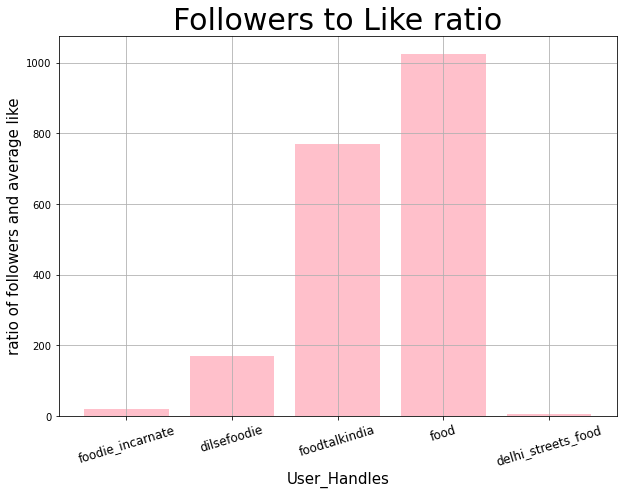

In [316]:
plt.figure(figsize=(10,7))
plt.bar(handles, ratio, color = 'pink')
plt.xticks(rotation = 17, size = 12)
plt.title('Followers to Like ratio', size = 30)
plt.xlabel('User_Handles', size = 15)
plt.ylabel('ratio of followers and average like', size = 15)
plt.grid()
plt.show()

In [317]:
driver.quit()